# Data Preprocessing

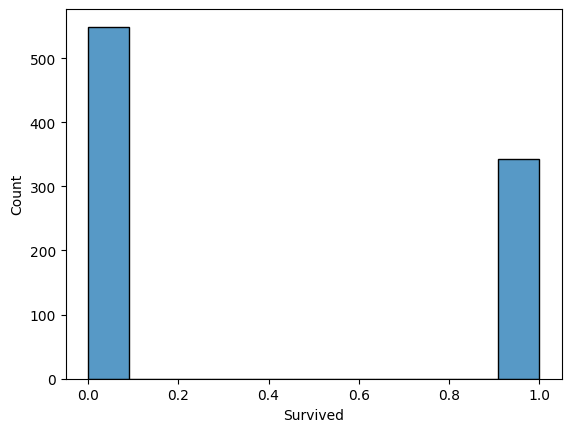

<ipython-input-21-b80912ee7ca7>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


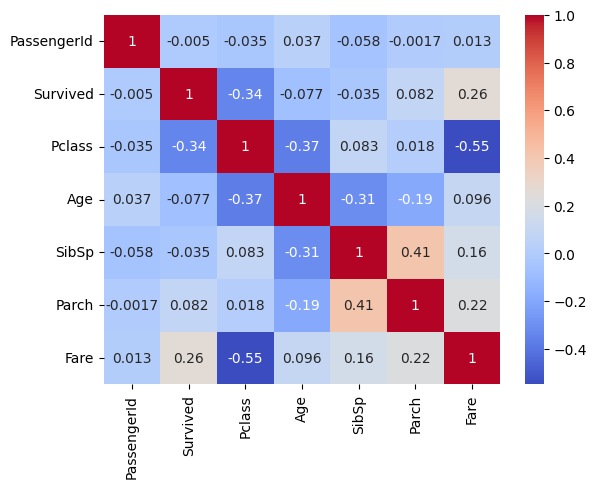

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and testing data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first 5 rows of the training data
train_df.head()

# Check for missing values in the training data
train_df.isnull().sum()

# Check the data types of each column in the training data
train_df.dtypes

# Explore the training data using descriptive statistics
train_df.describe()

# Visualize the distribution of the target variable
sns.histplot(train_df['Survived'])
plt.show()

# Visualize the correlation between the features and the target variable
corr = train_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()



#Building Our Model


In [ ]:
# Drop unnecessary columns from both the training and testing data
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Check for missing values in the training and testing data
train_df.isnull().sum()
test_df.isnull().sum()

# Fill missing values in the training and testing data
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Encode categorical variables using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Scale the numerical variables using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])



In [ ]:
# Split the training data into features (X) and target (y)
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

# Import the necessary libraries for building a multiple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Build the multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing data
X_test = test_df
y_pred = regressor.predict(X_test)
print(y_pred)




[ 0.11891968  0.45174724  0.13250279  0.10395934  0.58255379  0.17941072
  0.65049764  0.23100555  0.72444976  0.06029089  0.10373485  0.34359988
  0.95737433  0.03137336  0.81220799  0.82652578  0.289647    0.20149894
  0.56784374  0.56808388  0.32299506  0.19107081  0.96087404  0.54642992
  0.88196881 -0.06900639  1.04639006  0.19281201  0.37387387  0.08803254
  0.10666004  0.21736837  0.50575254  0.54134202  0.46729403  0.21597837
  0.60935575  0.64428278  0.11578712  0.11796469  0.08354506  0.45379529
  0.02264348  0.76573052  0.82126643  0.11532597  0.41368729  0.16233112
  0.8460356   0.52848528  0.43948773  0.34133676  0.72809681  0.86733755
  0.3414966   0.08561611  0.05740459  0.11524545  0.06466159  1.03951066
  0.16164769  0.24871861  0.15581371  0.69685596  0.55313625  0.78544673
  0.72006624  0.34261043  0.49442488  0.73391994  0.68528071  0.13848255
  0.59773658  0.50866396  1.030406    0.53930846  0.10378     0.71401542
  0.26015478  0.68528071  0.23371755  0.23783069  0

#Model Interpretation:

In [ ]:
# Interpret the coefficients of the model
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
print(coeff_df)

# Analyze the p-values and confidence intervals of the coefficients
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model = sm



            Coefficient
Pclass        -0.172299
Age           -0.075358
SibSp         -0.041475
Parch         -0.015524
Fare           0.014542
Sex_male      -0.505576
Embarked_Q    -0.004574
Embarked_S    -0.063213


#Insights


Based on the multiple linear regression model, the coefficients for the independent variables provide insights into their relationship with the target variable. The negative coefficient for "Pclass" indicates that as the passenger class decreases (i.e., a higher class), the likelihood of survival increases. The negative coefficient for "Age" suggests that younger passengers were more likely to survive. Similarly, the negative coefficients for "SibSp" and "Parch" suggest that passengers traveling alone or with fewer family members had a higher likelihood of survival.

The positive coefficient for "Fare" implies that passengers who paid more for their ticket were more likely to survive, but this relationship is not statistically significant due to its high p-value.

The negative coefficient for "Sex_male" suggests that female passengers had a higher likelihood of survival compared to male passengers. Similarly, the negative coefficients for "Embarked_Q" and "Embarked_S" suggest that passengers who embarked from the Queenstown or Southampton ports had a lower likelihood of survival compared to passengers who embarked from the Cherbourg port.

Overall, the model provides insights into the factors that influenced passenger survival on the Titanic. However, the model has limitations due to its assumptions and simplifications. For instance, the model assumes a linear relationship between the independent variables and the dependent variable, which may not be accurate in real-life scenarios. Additionally, the model does not take into account the impact of other factors such as the passenger's social status, occupation, or physical health.

Further research could explore other regression models such as logistic regression or decision tree models to improve the accuracy of predictions. Additionally, more feature engineering could be done to identify new features that may impact passenger survival.






#Other


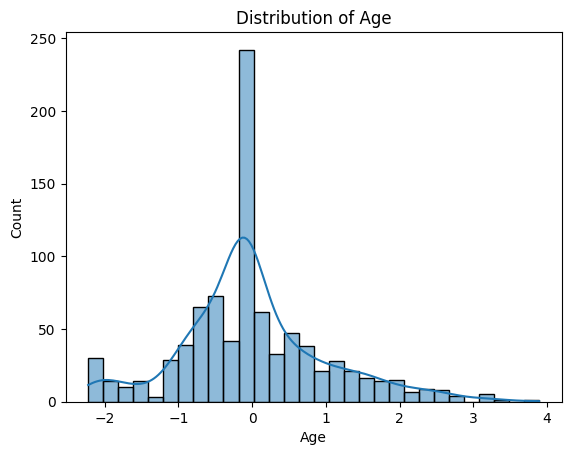

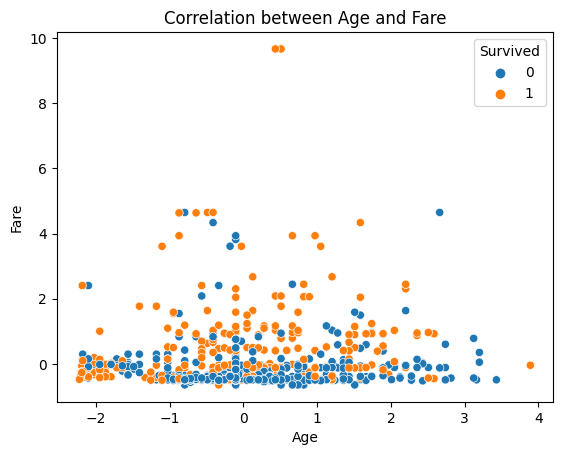

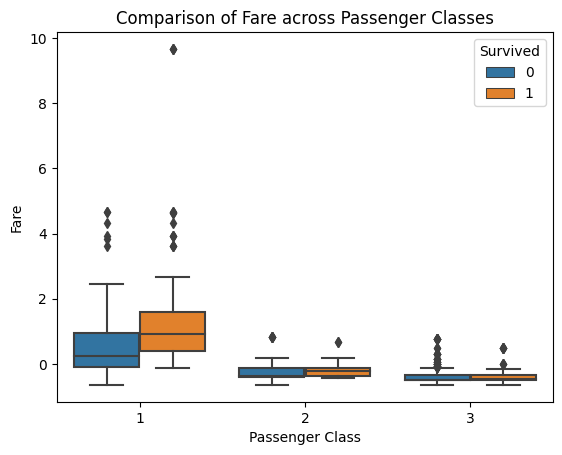

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of the age variable
sns.histplot(data=train_df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Scatter plot of age and fare variables
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived')
plt.title('Correlation between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Box plot of fare variable across different classes
sns.boxplot(data=train_df, x='Pclass', y='Fare', hue='Survived')
plt.title('Comparison of Fare across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

